In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing  # Updated dataset

# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["PRICE"] = housing.target  # Target variable

# Display first few rows
print(df.head())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [4]:
X = df.drop(columns="PRICE")  # All features except price
y = df["PRICE"]  # Price is what we want to predict

# Splitting data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (16512, 8), Testing Data: (4128, 8)


In [5]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # alpha controls feature selection strength
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [6]:
# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE) and Mean Absolute Error (MAE)
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} -> MSE: {mse:.2f}, MAE: {mae:.2f}")

evaluate_model("Linear Regression", y_test, y_pred_linear)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


Linear Regression -> MSE: 0.56, MAE: 0.53
Ridge Regression -> MSE: 0.56, MAE: 0.53
Lasso Regression -> MSE: 0.61, MAE: 0.58


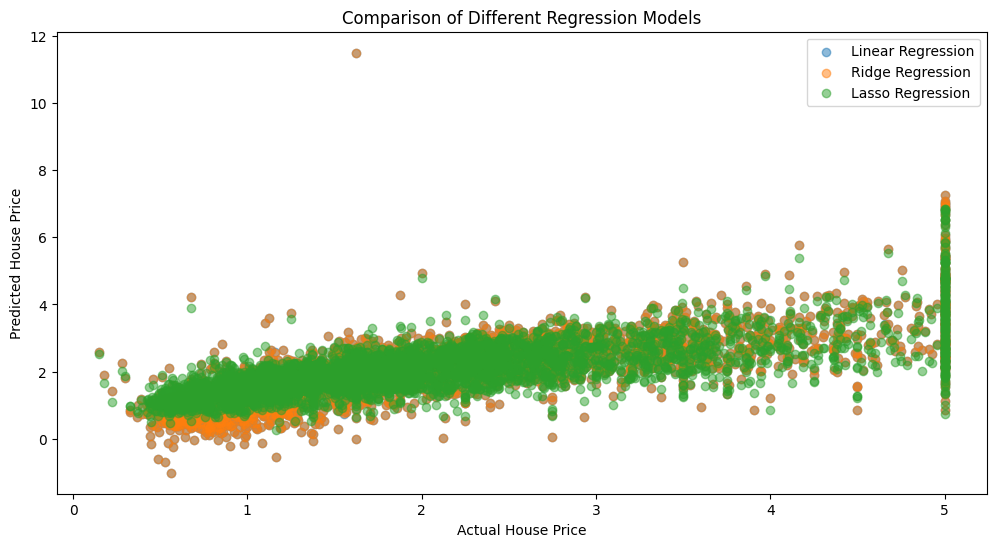

In [7]:
# Compare actual vs predicted prices
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred_linear, label="Linear Regression", alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label="Lasso Regression", alpha=0.5)

plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.legend()
plt.title("Comparison of Different Regression Models")
plt.show()
